<a href="https://colab.research.google.com/github/hochschule-pforzheim/project-st23-team-f23/blob/main/3_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dateien ablegen, um sie in Sitzungsspeicher hochzuladen
Laufwerk
83.52 GB verfügbar
Datensatz vorbereiten - Dummies, Skalen
Im ersten Schritt wird der Datensatz aus dem ersten Notebook unter dem Namen 'maindf' geladen. Hier muss der Datensatz "1_Cleansing_Join" aus dem vorherigen Notebook reingeladen werden.

In [ ]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')
maindf = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/2_Data_for_Modeltraining.csv")
#maindf = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/AI & ML/Projekt/1_Cleansing_Join_final.csv')

# Model Training & Evaluation

In [ ]:
X = maindf.drop(columns='adr')
y = maindf.adr

And split it into train and test sets:

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)

We will test the following models and compare their performance:

*   Linear Regression (with and without regularization)
*   Support Vector Mechine (SVM)
*   Decision Tree
*   Gradient Boosting


Before we do that, let's again implement a small `evaluate` function for measuring the performance of our model:

In [ ]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
def evaluate(reg, X_test, y_test):
  pred = reg.predict(X_test)
  print('R2:', r2_score(y_test, pred))
  print('MAE:', mean_absolute_error(y_test, pred))
  print('MSE:', mean_squared_error(y_test, pred))
  print('RMSE:', mean_squared_error(y_test, pred, squared=False))
  print('MAPE:', mean_absolute_percentage_error(y_test, pred))

# SVM

Next, we take a look at a support vector machine (SVM) model. Normally, SVMs are used for classification but they can also be applied to regression problems.

`sklearn` provides a SVM regression implementation which we can easily use:

In [ ]:
from sklearn.svm import LinearSVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [ ]:
lsvr = make_pipeline(StandardScaler(),
                     LinearSVR(random_state=42, tol=1e-5))

In [ ]:
lsvr.fit(X_train, y_train)

In [ ]:
evaluate(lsvr, X_test, y_test)

The SVM achieves a pretty good result - significantly better than the regression models.

In [ ]:
y_lsvr_predict = lsvr.predict(X_test)

## **Hyperparameter Tuning**

C: da LinearSVC: andere Parameter wie 'learning_rate' nicht valid.

Die Fehlermeldung "TypeError: Parameter grid for parameter 'C' is not iterable or a distribution (value=1)" deutet darauf hin, dass es ein Problem mit dem angegebenen Parameterraum für den Parameter 'C' gibt. Der Wert '1' allein ist nicht als Parameterraum gültig.

Um das Problem zu beheben, kannst du entweder einen spezifischen Wert oder einen Parameterraum für 'C' angeben. Hier sind zwei Möglichkeiten:

from scipy.stats import uniform

param_grid = {
    'C': uniform(loc=0.1, scale=10),

    Die Wahl zwischen der Verwendung spezifischer Werte und der Verwendung eines Parameterraums hat Vor- und Nachteile, die ich im Folgenden erläutern werde:

Option 1: Spezifische Werte für 'C':
Vorteile:

Einfachheit: Die Verwendung spezifischer Werte ist einfach und erfordert keine weiteren Berechnungen.
Kontrolle: Du hast direkte Kontrolle über die ausgewählten Werte für 'C' und kannst gezielt bestimmte Werte testen.
Nachteile:

Möglicher Informationsverlust: Es besteht die Möglichkeit, dass der optimale Wert für 'C' nicht in den spezifischen Werten enthalten ist. Dies kann dazu führen, dass das Tuning nicht das bestmögliche Ergebnis erzielt.
Option 2: Parameterraum für 'C':
Vorteile:

Flexibilität: Durch die Verwendung eines Parameterraums kannst du einen breiteren Bereich von 'C'-Werten abdecken und somit eine größere Chance haben, den optimalen Wert zu finden.
Automatisierte Suche: Der Hyperparameter-Tuning-Algorithmus (z. B. RandomizedSearchCV) kann den Parameterraum automatisch durchsuchen und die besten Kombinationen finden.
Nachteile:

Komplexität: Die Definition eines Parameterraums erfordert möglicherweise zusätzliche Überlegungen und Kenntnisse über die Wertebereiche von 'C'. Die Auswahl eines geeigneten Parameterraums kann eine gewisse Erfahrung oder Experimentation erfordern.
Berechnungsaufwand: Ein breiterer Parameterraum kann zu einer erhöhten Rechenzeit führen, da der Hyperparameter-Tuning-Algorithmus mehr Kombinationen ausprobieren muss.
Es ist wichtig zu beachten, dass die Vor- und Nachteile von Optionen wie spezifischen Werten oder Parameterräumen stark vom Anwendungsfall und den Eigenschaften des Modells abhängen können. Es empfiehlt sich, verschiedene Optionen auszuprobieren und die Auswirkungen auf die Leistung des Modells zu beobachten, um die besten Hyperparameter-Tuning-Strategien zu ermitteln.



In [ ]:
from scipy.stats import loguniform

param_grid = {
    'C': [0.1, 1, 10],
    'class_weight': [None, 'balanced'],
    'dual': [True, False],
    'fit_intercept': [True, False],
    'intercept_scaling': loguniform(0.1, 10),
    'loss': ['hinge', 'squared_hinge'],
    'max_iter': [100, 500, 1000],
    'penalty': ['l1', 'l2'],
    'tol': loguniform(0.0001, 0.1),
    'verbose': [0, 1]
}

In [ ]:
ht_lsvr = RandomizedSearchCV(lsvr, param_grid, random_state=42, n_iter=10)

In [ ]:
ht_svc.fit(X_train, y_train)

Trotz Hyperparameter Tuning richtig schlechte Accuracy => nicht geeignet

In [ ]:
evaluate(ht_svc, X_test, y_test)

# Gradient Boosting

Let's move on to a gradient boosting model.

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

In [ ]:
gb = make_pipeline(StandardScaler(),
                   GradientBoostingRegressor(random_state=42))

In [ ]:
gb.fit(X_train, y_train)

In [ ]:
evaluate(gb, X_test, y_test)

It achieves a very high performance!

In [ ]:
from sklearn.dummy import DummyRegressor

In [ ]:
dummy = DummyRegressor()

In [ ]:
dummy.fit(X_train, y_train)

In [ ]:
evaluate(dummy, X_test, y_test)

Instead of relying on a visual plot to determine the most important features, we can also utilize the `feature_importances_` attribute on the trained sklearn estimator:

In [ ]:
import numpy as np
feature_importance = gb.feature_importances_

# get indices sorted by importance
sorted_idx = np.argsort(feature_importance)

# generate range from 0 to the number of features
pos = np.arange(sorted_idx.shape[0])

# 'pos' acts as our value for the 'y' axis
plt.barh(pos, feature_importance[sorted_idx], align='center')

plt.yticks(pos, np.array(X.columns)[sorted_idx])
plt.title('Feature Importance (MDI)')
plt.show()

As expected, the feature importance we find here is similar to the one we found visually in the decision tree.

The model's performance appears to be quite promising so let's try to improve that further. For this purpose, we will perform some basic hyperparameter optimizations in a next step.

## Hyperparameter Tuning

We'll again be using the random search approach. As you can see from the `CV` suffix this is combined with cross-validation.

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

Again, we first have to define our hyperparameter grid:

In [ ]:
# the algorithm will try out random values from the lists we provide
grid = {'learning_rate': [0.15, 0.1, 0.05, 0.01, 0.005, 0.001],
        'n_estimators': [100, 250, 500, 750, 1000, 1250, 1500, 1750],
        'max_depth': [2, 3, 4, 5, 6, 7]}

We can now start the tuning process - limited to 100 iterations (100 different hyperparameter combinations). Note that this process can take a while because sklearn will fit the model 5 times (folds) for each iteration resulting in 500 total fits:

In [ ]:
# setting n_jobs=-1 will ensure that sklearn uses all available cpu cores
# takes a loooong time (reduce n_iter to make it faster)
optimized_gb = RandomizedSearchCV(pipeline, param_grid, n_iter=100, n_jobs=-1, random_state=42, cv=5, verbose=1)
optimized_gb.fit(X_train, y_train)

Now that the tuning is done, we can retrieve the best hyperparamter combination as follows:

In [ ]:
optimized_gb.best_params_

And evaluate the model trained using those parameters:

In [ ]:
evaluate(optimized_gb, X_test, y_test)

We improved the performance of our model slightly - not a huge improvement, but better than nothing!

The gradient boosting model (in fact, all ML models) might suffer from overfitting where they memorize the data instead of learning the underlying patterns. One way of detecting this for a gradient boosting model is plotting the train and test error against the number of iterations (i.e. how long the model was trained for).

Let's create this plot here:

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# get best xgb model (after hyperparam tuning)
best_gb = optimized_xgb.best_estimator_
# staged_predict returns the error after each stage in the model
predictions = best_gb.staged_predict(X_test)
# how many estimators were used for the model
n_estimators = optimized_gb.best_params_['n_estimators']

# calculate deviance (error) for all examples in test set
test_score = np.zeros((n_estimators,), dtype=np.float64)
for i, y_pred in enumerate(predictions):
    test_score[i] = best_gb.loss_(y_test, y_pred)

Now we can plot the test loss against the training loss which is already stored in the `train_score_` attribute.

In [ ]:
fig = plt.figure(figsize=(6, 6))
plt.subplot(1, 1, 1)
plt.title('Deviance')
plt.plot(np.arange(n_estimators) + 1, best_xgb.train_score_, 'b-',
         label='Training Set Deviance')
plt.plot(np.arange(n_estimators) + 1, test_score, 'r-',
         label='Test Set Deviance')
plt.legend(loc='upper right')
plt.xlabel('Boosting Iterations')
plt.ylabel('Deviance')
fig.tight_layout()
plt.show()

# **XGB Regression**

In [ ]:
# plot decision tree
from numpy import loadtxt
from xgboost import XGBRegressor
from xgboost import plot_tree
import matplotlib.pyplot as plt

# fit model no training data
xgb = make_pipeline(StandardScaler(),
                    XGBRegressor())
xgb.fit(X_train, y_train)

In [ ]:
evaluate(xgb, X_train, y_train)

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
# the algorithm will try out random values from the lists we provide
grid = {
    'xgbregressor__n_estimators': [100, 250, 500, 750, 1000, 1250, 1500, 1750],
    'xgbregressor__max_depth': [2, 3, 4, 5, 6, 7],
    'xgbregressor__learning_rate': [0.15, 0.1, 0.05, 0.01, 0.005, 0.001]
}

We can now start the tuning process - limited to 100 iterations (100 different hyperparameter combinations). Note that this process can take a while because sklearn will fit the model 5 times (folds) for each iteration resulting in 500 total fits:

In [ ]:
# setting n_jobs=-1 will ensure that sklearn uses all available cpu cores
# takes a loooong time (reduce n_iter to make it faster)
optimized_xgb = RandomizedSearchCV(xgb, grid, n_iter=100, n_jobs=-1, random_state=42, verbose=3)
optimized_xgb.fit(X_train, y_train)

Now that the tuning is done, we can retrieve the best hyperparamter combination as follows:

In [ ]:
optimized_xgb.best_params_

And evaluate the model trained using those parameters:

In [ ]:
evaluate(optimized_xgb, X_test, y_test)

We can see that there is not a big difference between training and test set deviance which means that our model is not suffering from overfitting (at least not heavily). However, we might choose to stop training after around iteration 20 as the additional iterations only contribute very little to the overall model performance. That being said, we are only looking at an individual hyperparam here so this might not be the true optimal parameter value.

# Lineare Regression

In [ ]:
from sklearn.linear_model import LinearRegression
linear = LinearRegression()

In [ ]:
from sklearn.pipeline import make_pipeline

linear_scaled = make_pipeline(scaler, linear)

In [ ]:
linear_scaled.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])

In [ ]:
evaluate_lin_reg(linear_scaled, X_test, y_test)

R2: 0.42282568506105156
MAE: 27.16709864849837
MSE: 1397.8925400717947
RMSE: 37.38840114356048
MAPE: 5558511303644893.0


In [ ]:
from sklearn.linear_model import RidgeCV

In [ ]:
import numpy as np

In [ ]:
n_alphas = 200
alphaValues = np.logspace(-10, -1, n_alphas)

linear_ridge = make_pipeline(scaler, RidgeCV(alphas=alphaValues))

In [ ]:
linear_ridge.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('ridgecv',
                 RidgeCV(alphas=array([1.00000000e-10, 1.10975250e-10, 1.23155060e-10, 1.36671636e-10,
       1.51671689e-10, 1.68318035e-10, 1.86791360e-10, 2.07292178e-10,
       2.30043012e-10, 2.55290807e-10, 2.83309610e-10, 3.14403547e-10,
       3.48910121e-10, 3.87203878e-10, 4.29700470e-10, 4.76861170e-10,
       5.29197874e-10, 5.87278661...
       9.11588830e-03, 1.01163798e-02, 1.12266777e-02, 1.24588336e-02,
       1.38262217e-02, 1.53436841e-02, 1.70276917e-02, 1.88965234e-02,
       2.09704640e-02, 2.32720248e-02, 2.58261876e-02, 2.86606762e-02,
       3.18062569e-02, 3.52970730e-02, 3.91710149e-02, 4.34701316e-02,
       4.82410870e-02, 5.35356668e-02, 5.94113398e-02, 6.59318827e-02,
       7.31680714e-02, 8.11984499e-02, 9.01101825e-02, 1.00000000e-01])))])

In [ ]:
linear_ridge[1].alpha_

0.1

In [ ]:
evaluate_lin_reg(linear_ridge, X_test,y_test)

R2: 0.4228256738331103
MAE: 27.167096968333425
MSE: 1397.8925672654082
RMSE: 37.388401507224245
MAPE: 5558511909652077.0


In [ ]:
maindf.adr.mean()

102.46612039949844

# cnn

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [ ]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
def evaluate(reg, X_test, y_test):
  pred = reg.predict(X_test)
  print('R2:', r2_score(y_test, pred))
  print('MAE:', mean_absolute_error(y_test, pred))
  print('MSE:', mean_squared_error(y_test, pred))
  print('RMSE:', mean_squared_error(y_test, pred, squared=False))
  print('MAPE:', mean_absolute_percentage_error(y_test, pred))

In [ ]:
X = maindf_c.drop(columns='adr')
y = maindf_c.adr

In [ ]:
X_scaled = maindf_scaled.drop(columns='adr')
y_scaled = maindf_scaled.is_canceled

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle = True)
X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42, shuffle = True)

In [ ]:
import tensorflow as tf
from tensorflow import keras

def build_model():
  model = keras.Sequential([
    keras.layers.Input(shape=(X_train.shape[1],)),
    keras.layers.Dense(64, activation=tf.nn.relu),
    keras.layers.Dense(64, activation=tf.nn.relu),
    keras.layers.Dense(1)
  ], name="MLP_model")

  optimizer = tf.keras.optimizers.RMSprop(0.001)

  model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae'])
  return model

model = build_model()
model.summary()

Model: "MLP_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 64)                2752      
                                                                 
 dense_7 (Dense)             (None, 64)                4160      
                                                                 
 dense_8 (Dense)             (None, 1)                 65        
                                                                 
Total params: 6,977
Trainable params: 6,977
Non-trainable params: 0
_________________________________________________________________


In [ ]:
import matplotlib.pyplot as plt
def plot_history(history):
  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Abs Error [in €]')
  plt.plot(history.epoch, np.array(history.history['mae']),
           label='Train')
  plt.plot(history.epoch, np.array(history.history['val_mae']),
           label = 'Val')
  plt.legend()
  plt.ylim([min(history.history['val_mae']),max(history.history['val_mae'])])
  plt.xlim([0,20])

def plot_prediction(test_labels, test_predictions):
  plt.figure()
  plt.scatter(test_labels, test_predictions)
  plt.xlabel('True Values')
  plt.ylabel('Predictions')
  plt.axis('equal')
  plt.xlim([-10, 100])
  plt.ylim([-30, 30])
  _ = plt.plot([-10, 10],[-10,10])

In [ ]:
EPOCHS = 20

history_scaled = model.fit(X_train_scaled, y_train_scaled, epochs=EPOCHS,
                    validation_split=0.2, verbose=1)

Epoch 1/20
1819/1819 [==============================] - 10s 5ms/step - loss: 1.1006 - mae: 0.5341 - val_loss: 0.4403 - val_mae: 0.4756
Epoch 2/20
1819/1819 [==============================] - 6s 3ms/step - loss: 1.2890 - mae: 0.5279 - val_loss: 2.4742 - val_mae: 1.1705
Epoch 3/20
1819/1819 [==============================] - 4s 2ms/step - loss: 1.3849 - mae: 0.5433 - val_loss: 0.6164 - val_mae: 0.5485
Epoch 4/20
1819/1819 [==============================] - 4s 2ms/step - loss: 1.2057 - mae: 0.5269 - val_loss: 0.4044 - val_mae: 0.4531
Epoch 5/20
1819/1819 [==============================] - 6s 3ms/step - loss: 0.7823 - mae: 0.4956 - val_loss: 0.3883 - val_mae: 0.4442
Epoch 6/20
1819/1819 [==============================] - 4s 2ms/step - loss: 1.0065 - mae: 0.5184 - val_loss: 0.6177 - val_mae: 0.5180
Epoch 7/20
1819/1819 [==============================] - 6s 3ms/step - loss: 1.1572 - mae: 0.5019 - val_loss: 0.4542 - val_mae: 0.4817
Epoch 8/20
1819/1819 [==============================] - 13s 7

In [ ]:
evaluate(model, X_test_scaled, y_test_scaled)

569/569 [==============================] - 1s 1ms/step
R2: 0.5192020338038864
MAE: 0.4592678044731084
MSE: 0.44255444981625425
RMSE: 0.6652476605116731
MAPE: 1.9907029463381303


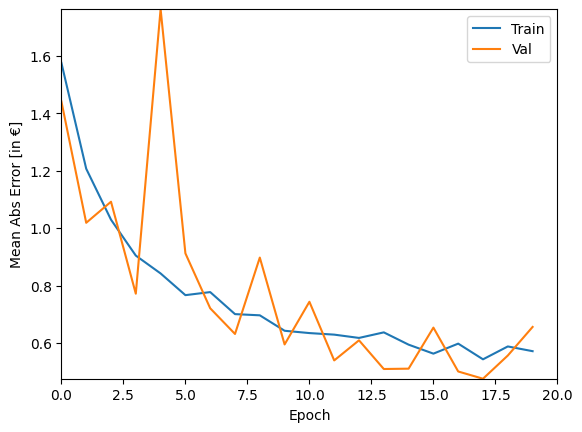

In [ ]:
plot_history(history_scaled)

In [ ]:
# nicht skalierte Daten

In [ ]:
import matplotlib.pyplot as plt
def plot_history(history):
  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Abs Error [in €]')
  plt.plot(history.epoch, np.array(history.history['mae']),
           label='Train')
  plt.plot(history.epoch, np.array(history.history['val_mae']),
           label = 'Val')
  plt.legend()
  plt.ylim([20,max(history.history['val_mae'])])
  plt.xlim([0,50])

In [ ]:
EPOCHS = 50

history = model.fit(X_train, y_train, epochs=EPOCHS,
                    validation_split=0.2, verbose=1)

Epoch 1/50
1819/1819 [==============================] - 10s 6ms/step - loss: 3365.4966 - mae: 38.9115 - val_loss: 3292.8914 - val_mae: 49.0797
Epoch 2/50
1819/1819 [==============================] - 4s 2ms/step - loss: 2578.7412 - mae: 34.4618 - val_loss: 1749.1882 - val_mae: 30.7689
Epoch 3/50
1819/1819 [==============================] - 4s 2ms/step - loss: 2341.2163 - mae: 32.3972 - val_loss: 2563.1155 - val_mae: 41.9399
Epoch 4/50
1819/1819 [==============================] - 5s 3ms/step - loss: 2186.2996 - mae: 31.0018 - val_loss: 1663.3453 - val_mae: 31.6363
Epoch 5/50
1819/1819 [==============================] - 4s 2ms/step - loss: 2093.2410 - mae: 30.1038 - val_loss: 1435.6307 - val_mae: 27.9443
Epoch 6/50
1819/1819 [==============================] - 4s 2ms/step - loss: 2041.9302 - mae: 29.4628 - val_loss: 1381.5854 - val_mae: 27.6779
Epoch 7/50
1819/1819 [==============================] - 5s 3ms/step - loss: 2004.7507 - mae: 29.0814 - val_loss: 1408.8329 - val_mae: 28.5276
Epoch

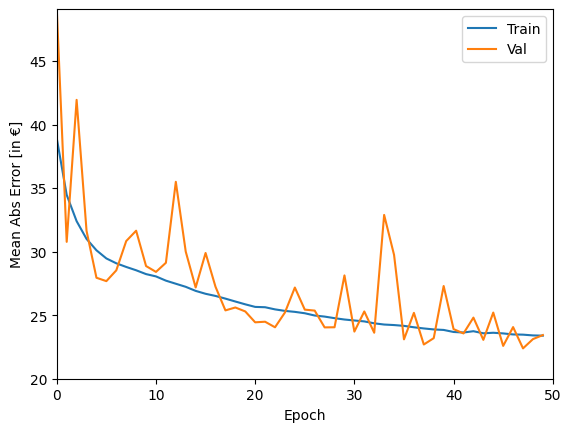

In [ ]:
plot_history(history)

> Aus der Grafik können wir erkennen, dass der Mean Absolute Error bei ~24€ liegt.

In [ ]:
def build_conv1D_model():

  n_timesteps = X_train.shape[1]
  n_features  = 1
  model = keras.Sequential(name="model_conv1D")
  model.add(keras.layers.Input(shape=(n_timesteps,n_features)))
  model.add(keras.layers.Conv1D(filters=64, kernel_size=7, activation='relu', name="Conv1D_1"))
  model.add(keras.layers.Dropout(0.5))
  model.add(keras.layers.Conv1D(filters=32, kernel_size=3, activation='relu', name="Conv1D_2"))

  model.add(keras.layers.Conv1D(filters=16, kernel_size=2, activation='relu', name="Conv1D_3"))

  model.add(keras.layers.MaxPooling1D(pool_size=2, name="MaxPooling1D"))
  model.add(keras.layers.Flatten())
  model.add(keras.layers.Dense(32, activation='relu', name="Dense_1"))
  model.add(keras.layers.Dense(n_features, name="Dense_2"))


  optimizer = tf.keras.optimizers.RMSprop(0.001)

  model.compile(loss='mse',optimizer=optimizer,metrics=['mae'])
  return model

model_conv1D = build_conv1D_model()
model_conv1D.summary()

Model: "model_conv1D"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Conv1D_1 (Conv1D)           (None, 36, 64)            512       
                                                                 
 dropout (Dropout)           (None, 36, 64)            0         
                                                                 
 Conv1D_2 (Conv1D)           (None, 34, 32)            6176      
                                                                 
 Conv1D_3 (Conv1D)           (None, 33, 16)            1040      
                                                                 
 MaxPooling1D (MaxPooling1D)  (None, 16, 16)           0         
                                                                 
 flatten_3 (Flatten)         (None, 256)               0         
                                                                 
 Dense_1 (Dense)             (None, 32)               

In [ ]:
[loss, mae] = model_conv1D.evaluate(X_test, y_test, verbose=0)
print(f'Mean Abs Error (test data): {mae}')

Mean Abs Error (test data): 190.51576232910156


569/569 [==============================] - 4s 6ms/step


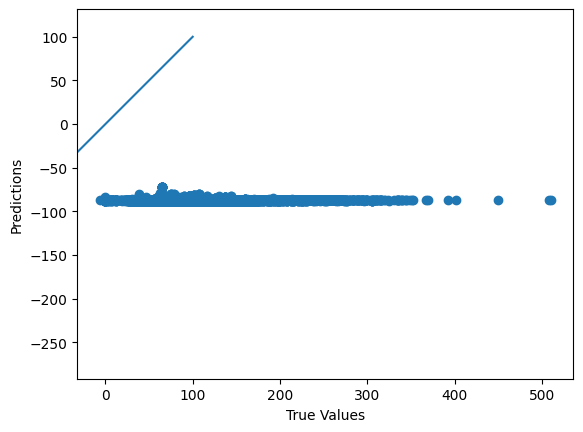

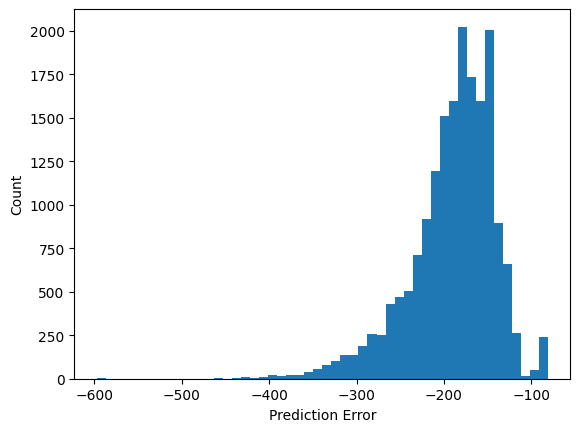

In [ ]:
test_predictions = model_conv1D.predict(X_test).flatten()
plot_prediction(y_test, test_predictions)

## Optimizer: SGD

In [ ]:
from keras.optimizers import SGD

def build_model():
  model = keras.Sequential([
    keras.layers.Input(shape=(X_train.shape[1],)),
    keras.layers.Dense(64, activation=tf.nn.relu),
    keras.layers.Dense(64, activation=tf.nn.relu),
    keras.layers.Dense(1)
  ], name="MLP_model")

  optimizer = SGD(lr=0.01, momentum=0.9)

  model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae'])
  return model

model = build_model()
model.summary()

Model: "MLP_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 64)                2752      
                                                                 
 dense_13 (Dense)            (None, 64)                4160      
                                                                 
 dense_14 (Dense)            (None, 1)                 65        
                                                                 
Total params: 6,977
Trainable params: 6,977
Non-trainable params: 0
_________________________________________________________________


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [ ]:
EPOCHS = 50

history_sdg = model.fit(X_train, y_train, epochs=EPOCHS,
                    validation_split=0.2, verbose=1)

Epoch 1/50
1819/1819 [==============================] - 7s 3ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 2/50
1819/1819 [==============================] - 4s 2ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 3/50
1819/1819 [==============================] - 5s 2ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 4/50
1819/1819 [==============================] - 4s 2ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 5/50
1819/1819 [==============================] - 4s 2ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 6/50
1819/1819 [==============================] - 5s 3ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 7/50
1819/1819 [==============================] - 4s 2ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 8/50
1819/1819 [==============================] - 4s 2ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 9/50
1819/1819 [==

KeyboardInterrupt: ignored

## Optimizer: Adam

In [ ]:
def plot_history(history):
  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Abs Error [in €]')
  plt.plot(history.epoch, np.array(history.history['mae']),
           label='Train')
  plt.plot(history.epoch, np.array(history.history['val_mae']),
           label = 'Val')
  plt.legend()
  plt.ylim([min(history.history['val_mae'])-2,max(history.history['val_mae'])+2])
  plt.xlim([0,50])

In [ ]:
from keras.optimizers import Adam

def build_model():
  model = keras.Sequential([
    keras.layers.Input(shape=(X_train.shape[1],)),
    keras.layers.Dense(64, activation=tf.nn.relu),
    keras.layers.Dense(64, activation=tf.nn.relu),
    keras.layers.Dense(1)
  ], name="MLP_model")

  optimizer = Adam()

  model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae'])
  return model

model = build_model()
model.summary()

Model: "MLP_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 64)                2752      
                                                                 
 dense_25 (Dense)            (None, 64)                4160      
                                                                 
 dense_26 (Dense)            (None, 1)                 65        
                                                                 
Total params: 6,977
Trainable params: 6,977
Non-trainable params: 0
_________________________________________________________________


In [ ]:
EPOCHS = 50

history_adam = model.fit(X_train, y_train, epochs=EPOCHS,
                    validation_split=0.2, verbose=1)

Epoch 1/50
1819/1819 [==============================] - 13s 6ms/step - loss: 2558.8235 - mae: 34.2157 - val_loss: 1630.4594 - val_mae: 30.6613
Epoch 2/50
1819/1819 [==============================] - 4s 2ms/step - loss: 2115.4465 - mae: 30.2550 - val_loss: 1569.8961 - val_mae: 29.1122
Epoch 3/50
1819/1819 [==============================] - 6s 3ms/step - loss: 2002.6569 - mae: 29.2094 - val_loss: 1395.1445 - val_mae: 27.5420
Epoch 4/50
1819/1819 [==============================] - 4s 2ms/step - loss: 1960.4406 - mae: 28.7352 - val_loss: 1454.6753 - val_mae: 27.9031
Epoch 5/50
1819/1819 [==============================] - 4s 2ms/step - loss: 1943.5918 - mae: 28.4907 - val_loss: 1377.1796 - val_mae: 27.8339
Epoch 6/50
1819/1819 [==============================] - 6s 3ms/step - loss: 1917.7445 - mae: 28.2093 - val_loss: 1507.0005 - val_mae: 29.7568
Epoch 7/50
1819/1819 [==============================] - 4s 2ms/step - loss: 1901.0231 - mae: 28.0401 - val_loss: 1343.0734 - val_mae: 27.2468
Epoch

In [ ]:
evaluate(model, X_test, y_test)

569/569 [==============================] - 1s 1ms/step
R2: 0.5572093028683265
MAE: 23.07831000367033
MSE: 1072.4209243424643
RMSE: 32.74783846824801
MAPE: 5282234059023642.0


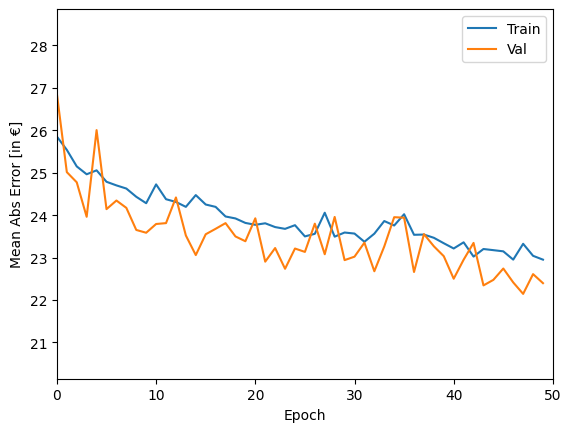

In [ ]:
plot_history(history_adam)

In [ ]:
def build_conv1D_model():

  n_timesteps = X_train.shape[1]
  n_features  = 1
  model = keras.Sequential(name="model_conv1D")
  model.add(keras.layers.Input(shape=(n_timesteps,n_features)))
  model.add(keras.layers.Conv1D(filters=64, kernel_size=7, activation='relu', name="Conv1D_1"))
  model.add(keras.layers.Dropout(0.5))
  model.add(keras.layers.Conv1D(filters=32, kernel_size=3, activation='relu', name="Conv1D_2"))

  model.add(keras.layers.Conv1D(filters=16, kernel_size=2, activation='relu', name="Conv1D_3"))

  model.add(keras.layers.MaxPooling1D(pool_size=2, name="MaxPooling1D"))
  model.add(keras.layers.Flatten())
  model.add(keras.layers.Dense(32, activation='relu', name="Dense_1"))
  model.add(keras.layers.Dense(n_features, name="Dense_2"))


  optimizer = Adam()

  model.compile(loss='mse',optimizer=optimizer,metrics=['mae'])
  return model

model_conv1D = build_conv1D_model()
model_conv1D.summary()

Model: "model_conv1D"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Conv1D_1 (Conv1D)           (None, 36, 64)            512       
                                                                 
 dropout_1 (Dropout)         (None, 36, 64)            0         
                                                                 
 Conv1D_2 (Conv1D)           (None, 34, 32)            6176      
                                                                 
 Conv1D_3 (Conv1D)           (None, 33, 16)            1040      
                                                                 
 MaxPooling1D (MaxPooling1D)  (None, 16, 16)           0         
                                                                 
 flatten_4 (Flatten)         (None, 256)               0         
                                                                 
 Dense_1 (Dense)             (None, 32)               

In [ ]:
[loss, mae] = model_conv1D.evaluate(X_test, y_test, verbose=0)
print(f'Mean Abs Error (test data): {mae}')

Mean Abs Error (test data): 107.39411163330078


569/569 [==============================] - 2s 4ms/step


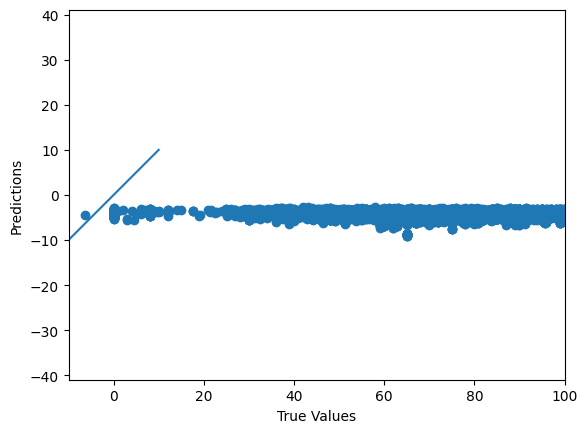

In [ ]:
test_predictions = model_conv1D.predict(X_test).flatten()
plot_prediction(y_test, test_predictions)